###  By Hassan Arabi
# ============================================================

## Video Rental Company "Sakila"

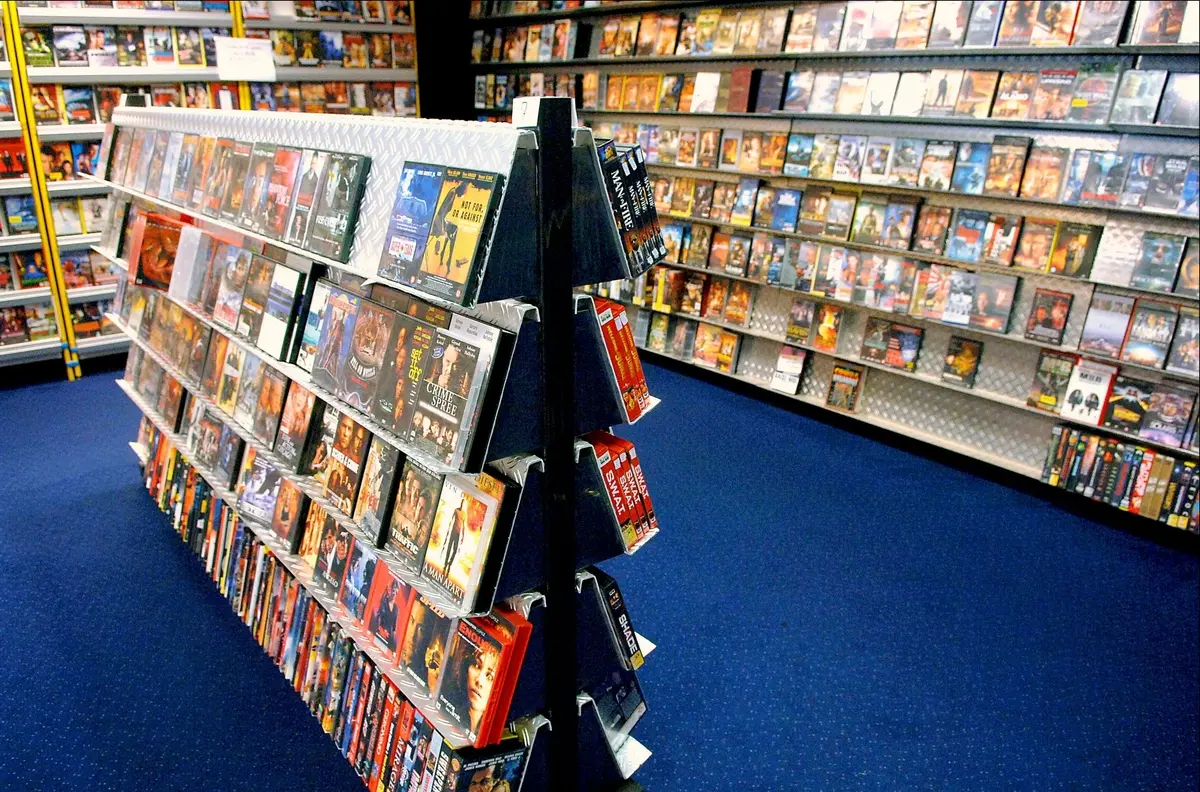

## Video Rental Company 


### Goal: Survival of video rental company in the era of Online Streaming Apps such as Netflix, Amazon Prime, Hotstar & Disney plus.

### Video rental company wants to increase their sales and customer satisfaction by providing trendy movies available at store locations in peak seasons.



## => Value Chain Framework
### + Value 
#### -        Increase in sales and customer base.
### + Action 
#### -      Place order of high demanding movies from supplier.
### + Decision 
#### -    Select movies as per clients’ choice on movie category, movie stars, at the right time of the business year.
### + Analytics :
#### - Is there a group of actors or actresses whose movies are significantly more popular between customers?
#### - Is cash flow changes in different times of the year?
#### - Is there a film category or film rating that is meaningfully more popular among customers?¶




### + Data:
#### - Structured SQL database for Sakila company during the year 2005 and 2006.


### + Business Objective :
#### - To provide movies to costumers as per their preferences .
#### -                                    To focus on inventory during peak season.


### +-+-+-+-+-+-+ Codes and Charts

In [1]:
#importing the potentially necessary libraries
#for running SQL 
import sqlite3

#Pandas for working with dateframes
import pandas as pd

#a package to conduct Explorretory Data Analysis for Null values in the dataset
import missingno as msno

# For Visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyecharts.charts import Pie
from pyecharts import options as opts

In [2]:
# Connect to the database 
con = sqlite3.connect("sakila.db")

### Performing EDA


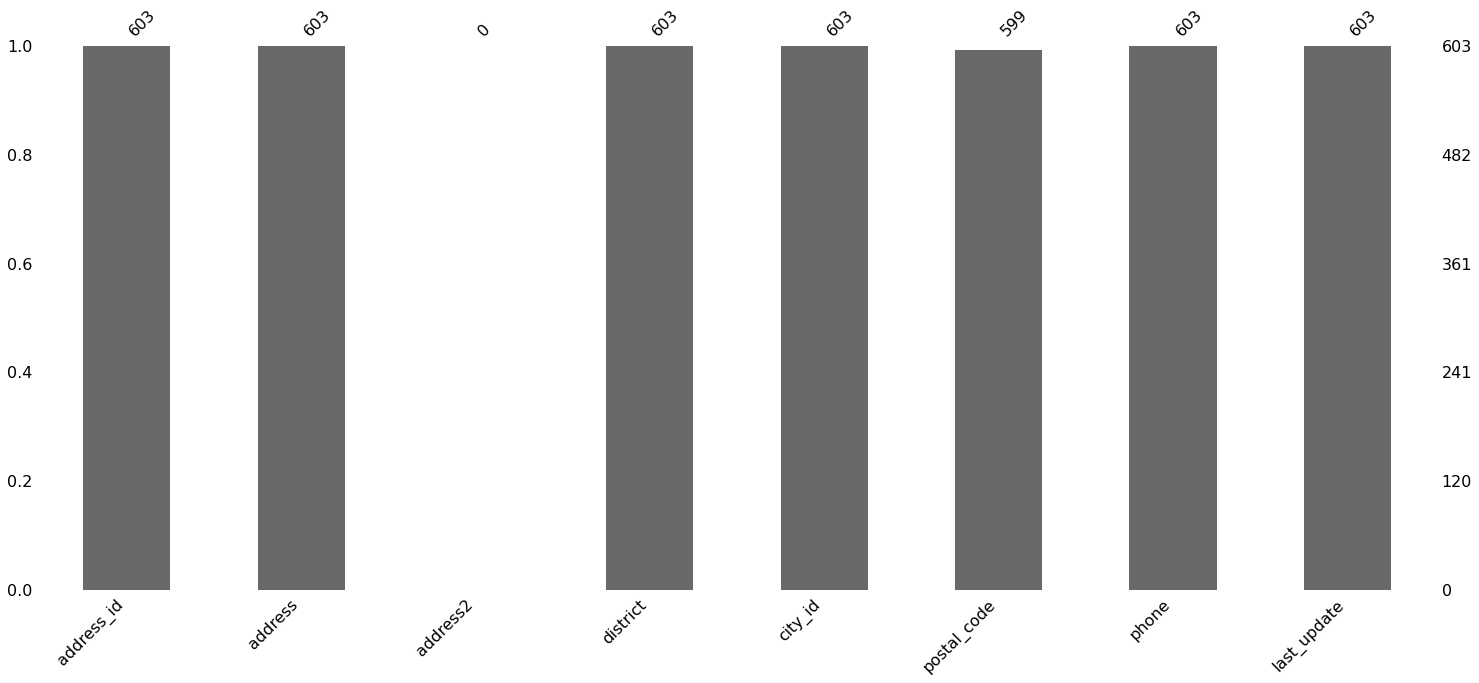

In [3]:
#Performing EDA using Pandas and "missingo" package

# the query object that returns all the records from address table
add =''' SELECT * FROM address '''
# saving the result of the query as a DataFrame
address = pd.read_sql(add, con)
# Are there any Null values? Where are the Null values in this table?
msno.bar(address);

#### Fig.1 - Number of Null values in the table "Address"

In [4]:
address

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2011-09-14 18:05:16
1,2,28 MySQL Boulevard,None,,576,None,,2011-09-14 18:05:16
2,3,23 Workhaven Lane,None,,300,None,,2011-09-14 18:05:16
3,4,1411 Lillydale Drive,None,,576,None,,2011-09-14 18:05:16
4,5,1913 Hanoi Way,None,,463,35200,,2011-09-14 18:05:16
...,...,...,...,...,...,...,...,...
598,601,844 Bucuresti Place,None,,242,36603,,2011-09-14 18:05:28
599,602,1101 Bucuresti Boulevard,None,,401,97661,,2011-09-14 18:05:28
600,603,1103 Quilmes Boulevard,None,,503,52137,,2011-09-14 18:05:28
601,604,1331 Usak Boulevard,None,,296,61960,,2011-09-14 18:05:28


### The "address2" and "phone" columns are completely empty there are 4 Null values in "postal_code" column

In [5]:
#Exploring the "City" table:
city='''select count(distinct city_id) as "number of cities" from address
 
'''
city= pd.read_sql(city, con)
city

,number of cities
0,599


### list of customers contains addresses from 599 different cities.

In [6]:
# Exploring the "Customer" table
cus='''select count(*) as "number of records",count(distinct customer_id) as "number of unique customers" from rental
 
'''
customer= pd.read_sql(cus, con)
customer

,number of records,number of unique customers
0,16044,599


### There are 16044 instances of movie rental in our database and the number of unique customers is 599.
### ----------------------------

## Main query
#### This dataframe should provide us with necessary data to answer our business questions, which are :
#### 1- Which movie ratings or movie categories are more in trend? 
#### 2- What months of the year is our Peak seasons?
#### 3- Which actors are more popular among customers?



In [7]:
query='''with 
flm_cat as (
select fc.film_id, cat.name as "film_category" from film_category as fc
left join category as cat on fc.category_id=cat.category_id
),
rent_film as (
     select rn.rental_id,
       flm_cat.film_category,
       f.film_id, f.title as "film_title", f.release_year, f.rental_duration, f.rental_rate, f.replacement_cost, f.rating,
       strftime('%Y',rental_date) as "rental_Year",
       strftime('%m',rental_date) as "rental_Month",
       strftime('%d',rental_date) as "rental_Day",
       strftime('%H',rental_date) as "rental_Hour"
     from inventory as i
     left join rental as rn on rn.inventory_id=i.inventory_id
     left join film as f on f.film_id=i.film_id
     left join flm_cat on flm_cat.film_id=i.film_id),

a as (
     select actor_id, first_name|| "_" ||last_name as "actors" from actor
),
b as (
     select film_id,a.actor_id, actors from a 
     inner join film_actor as fa on a.actor_id=fa.actor_id
),
flm_act as (
     SELECT
     film_id,
     GROUP_CONCAT(actors,' ') actors
     from b
     group by film_id  
)

select *
from rent_film as rf
left join payment as pay on rf.rental_id=pay.rental_id
left join flm_act as f_a on f_a.film_id=rf.film_id
 
'''
df= pd.read_sql(query, con)
#replacing the Month with the name of the month
month=['']
for i in df['rental_Month']:
    if i=='02':
        month.append('February'),
    elif i=='05':
        month.append('May'),
    elif i=='06':
        month.append('June'),
    elif i=='07':
        month.append('July'),
    elif i=='08':
        month.append('August')
     
        
month.pop(0)
month.insert(0, "July")
df['Month']=month

#Cleaning dataframe 
df=df.drop(['rental_Month','rental_id','film_id','release_year','customer_id','staff_id','payment_date',
            'last_update','rental_Year','rental_duration','payment_id'
            ],axis=1)

# There are 
df=df.dropna()
df

,film_category,film_title,rental_rate,replacement_cost,rating,rental_Day,rental_Hour,amount,actors,Month
0,Documentary,ACADEMY DINOSAUR,0.99,20.99,PG,08,19,0.99,PENELOPE_GUINESS CHRISTIAN_GABLE LUCILLE_TRACY SANDRA_PECK JOHNNY_CAGE MENA_TEMPLE WARREN_NOLTE OPRAH_KILMER ROCK_DUKAKIS MARY_KEITEL,July
1,Documentary,ACADEMY DINOSAUR,0.99,20.99,PG,02,20,3.99,PENELOPE_GUINESS CHRISTIAN_GABLE LUCILLE_TRACY SANDRA_PECK JOHNNY_CAGE MENA_TEMPLE WARREN_NOLTE OPRAH_KILMER ROCK_DUKAKIS MARY_KEITEL,July
2,Documentary,ACADEMY DINOSAUR,0.99,20.99,PG,21,21,3.99,PENELOPE_GUINESS CHRISTIAN_GABLE LUCILLE_TRACY SANDRA_PECK JOHNNY_CAGE MENA_TEMPLE WARREN_NOLTE OPRAH_KILMER ROCK_DUKAKIS MARY_KEITEL,August
3,Documentary,ACADEMY DINOSAUR,0.99,20.99,PG,30,20,1.99,PENELOPE_GUINESS CHRISTIAN_GABLE LUCILLE_TRACY SANDRA_PECK JOHNNY_CAGE MENA_TEMPLE WARREN_NOLTE OPRAH_KILMER ROCK_DUKAKIS MARY_KEITEL,August
4,Documentary,ACADEMY DINOSAUR,0.99,20.99,PG,17,20,0.99,PENELOPE_GUINESS CHRISTIAN_GABLE LUCILLE_TRACY SANDRA_PECK JOHNNY_CAGE MENA_TEMPLE WARREN_NOLTE OPRAH_KILMER ROCK_DUKAKIS MARY_KEITEL,May
...,...,...,...,...,...,...,...,...,...,...
16040,Comedy,ZORRO ARK,4.99,18.99,NC-17,29,03,4.99,IAN_TANDY NICK_DEGENERES LISA_MONROE,May
16041,Comedy,ZORRO ARK,4.99,18.99,NC-17,15,21,4.99,IAN_TANDY NICK_DEGENERES LISA_MONROE,June
16042,Comedy,ZORRO ARK,4.99,18.99,NC-17,12,13,9.99,IAN_TANDY NICK_DEGENERES LISA_MONROE,July
16043,Comedy,ZORRO ARK,4.99,18.99,NC-17,31,07,4.99,IAN_TANDY NICK_DEGENERES LISA_MONROE,July


### The "df" data frame shows every instance of payment with the related data about the type of the movie and time of the year.

In [8]:
#performing EDA for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16004 entries, 0 to 16044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   film_category     16004 non-null  object 
 1   film_title        16004 non-null  object 
 2   rental_rate       16004 non-null  float64
 3   replacement_cost  16004 non-null  float64
 4   rating            16004 non-null  object 
 5   rental_Day        16004 non-null  object 
 6   rental_Hour       16004 non-null  object 
 7   amount            16004 non-null  float64
 8   actors            16004 non-null  object 
 9   Month             16004 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.3+ MB


### ============================
## 1- Which movie ratings are more in trend? 
### ============================

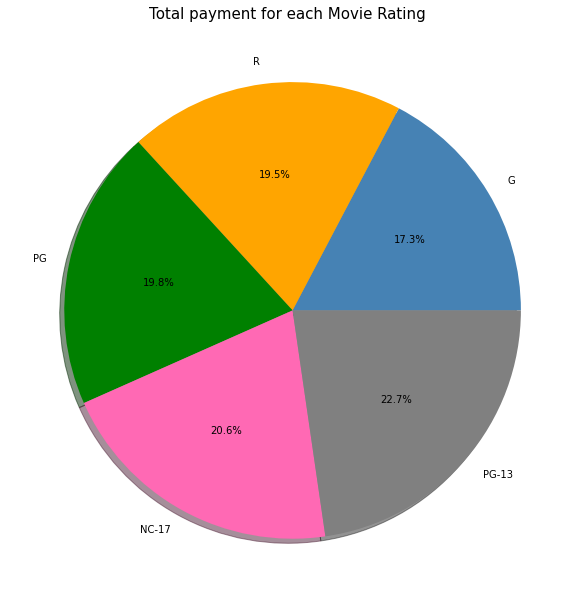

In [9]:
# Which movie rating is generating more revenue?

c=df.groupby(by='rating').sum().sort_values(by='amount')

labels = c.index
sizes = c.amount
colors=['steelblue','orange','g','hotpink','grey','violet']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        labels=labels, autopct='%1.1f%%',
        colors=colors,
        shadow=True, startangle=0)
fig1.set_size_inches(18.5, 10.5)

plt.title('Total payment for each Movie Rating  ',fontsize=15)


plt.show()

#### Fig.2 - Total amount spent by customers per movie rating

### - As shown in the chart above, there is no significant difference between movie ratings so we should not invest more in any speciefic rating in new orders from our supplier.

In [10]:
#Create a version of our dataframe suitable for our chart
cat=df.groupby(by='film_category').sum().sort_values(by='amount')

cat['percentage']=round(100*cat.amount/cat.amount.sum(),1)
c=cat.sort_values(by='percentage')
ca = cat.index.values.tolist()
d = cat['percentage'].values.tolist()

rosechart = Pie(init_opts=opts.InitOpts(width='700px', height='700px'))

# add the data to the rosechart
tup=tuple(zip(ca, d))
rosechart.add("",tup,
        radius=["20%", "60%"],  # 20% inside radius，95% ourside radius
        center=["50%", "50%"],   # center of the chart
        rosetype="area")
# set the global options for the chart
rosechart.set_global_opts(title_opts=opts.TitleOpts(title='SUM OF PAYMENTS',subtitle="PER MOVIE CATEGORY"),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())
# set the series options
rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="outside", font_size=12,formatter="{b}: {c}%", font_style="italic",font_weight="bold", font_family="Century"),)
rosechart.render_notebook()

#### Fig.3 - Total amount spent by customers by movie category

### This chart represents sum of payments as per the film category, and as our analysis highlights, "Sports" is the best performing category in terms of the total payment, wheras "Music" is the category that our customers paid the least amount of money for. 
### Since, as shown in the graph, there is no movie category that is performing remarkably better among others, in the upcomming purchase list all the categories should be evenly included.

### ============================
## 2- What months of the year is our Peak seasons?
### ============================


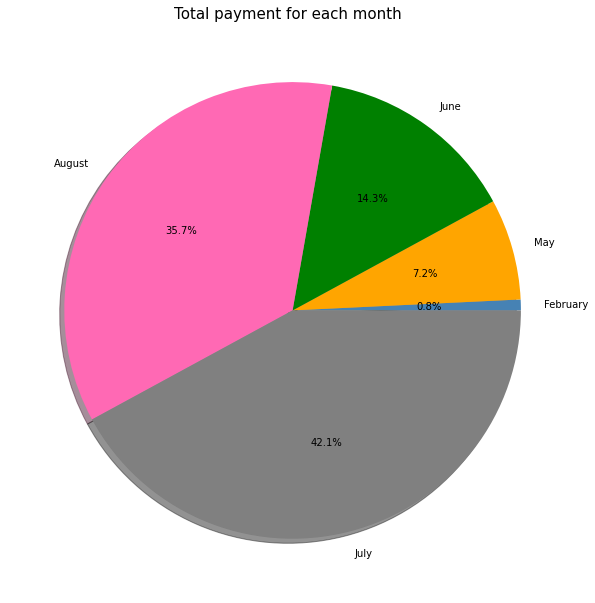

In [11]:
# Which month is our peak time? 
m=df.groupby(by='Month').sum().sort_values(by='amount')

labels = m.index
sizes = m.amount
colors=['steelblue','orange','g','hotpink','grey','violet']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
#        explode=explode,
        labels=labels, autopct='%1.1f%%',
        colors=colors,
        shadow=True, startangle=0)
fig1.set_size_inches(18.5, 10.5)

plt.title('Total payment for each month  ',fontsize=15)



plt.show()

#### Fig.4- Total amount spent by customers in each month

### This graph depicts total payment as per the month. Our dataset contained the payments for five months of the year as follows: February, May, June, July and August, and throughout these months, July and August have the biggest flow of cash (42.1% and 35.7% respectively). This means the company should be prepared on necessary inventory and staff during these months to meet the customer demands. 

### ============================
## 3- Which actors are more popular with customers?
### ============================

In [12]:
#Most frequent names in actors column
list=df.actors
name=' '.join(list)

from collections import Counter
  
data_set = name
  
# split() returns list of all the words in the string
split_it = name.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most = Counter.most_common(20)

df3 = pd.DataFrame(most, columns =['Name', 'num'])
list=df3.Name
movie_star=df[df.actors.str.contains('|'.join(list))]

per=100*movie_star.amount.sum()/df.amount.sum()
print('The percentage of the entire amount is:', round(per,1))

The percentage of the entire amount is: 53.3


In [13]:
list

0            SUSAN_DAVIS
1         GINA_DEGENERES
2         MATTHEW_CARREY
3            MARY_KEITEL
4     ANGELA_WITHERSPOON
5            WALTER_TORN
6            HENRY_BERRY
7            JAYNE_NOLTE
8             VAL_BOLGER
9          SANDRA_KILMER
10          SEAN_GUINESS
11         ANGELA_HUDSON
12        SCARLETT_DAMON
13          EWAN_GOODING
14         KEVIN_GARLAND
15          WARREN_NOLTE
16            JADA_RYDER
17         WOODY_HOFFMAN
18     CAMERON_ZELLWEGER
19          SIDNEY_CROWE
Name: Name, dtype: object

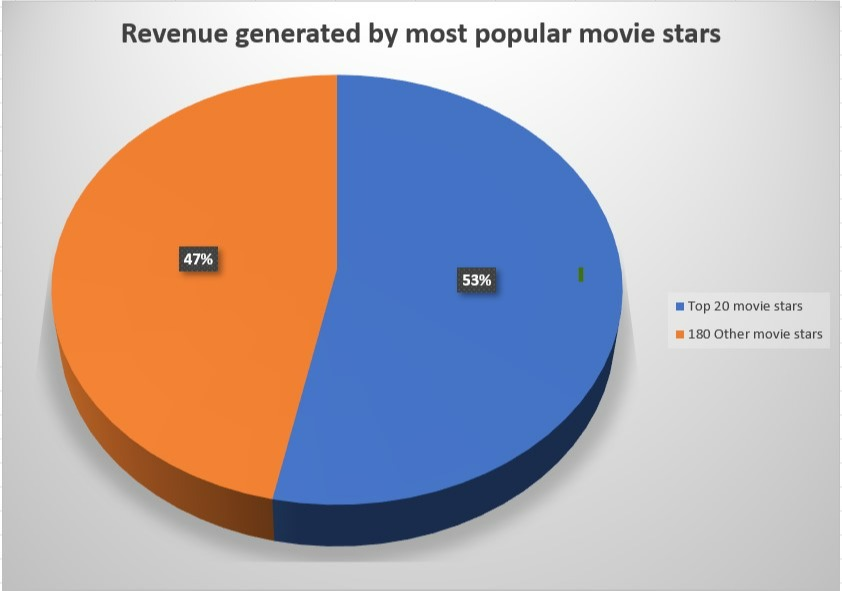

#### Fig.5- Total cash flow caused by top 20 popular movie stars

### There are 200 actors and actresses in our database, Our analysis illustrates not all movie stars perform the same in our market. More than 53% of the total payments have been for the movies that featured these 20 actors and actresses. 
### We recommend company to focus on popular celebrities as listed above since their movies are noticeably more popular in our target audience. 

### =================================================
# Conclusion:


 ### We concluded that July and August are two crucial months for the company. Both months aggregated as 3/4th of the portion in terms of revenue generation. That is why, company should order more inventory during these peak months. Its very important for business to be proactive during that time frame.
### Apart from that, movie stars is an important factor to be considered by the company when ordering new list of movies. There were 20 celebrities whose movies collected more than 50 % of the payments for business in provided data year.
### In terms of movie categories and ratings, no significant pattern or difference was discovered, therefore, movie rating and movie category are not important indicators of the success of a movie in our market. Based on this, we recommend the Sakila company to not to neglect any category or rating. 


# =======================================================
# =======================================================
# =======================================================